In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 7us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

house price ( base : $1000 )

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

make model

In [6]:
from keras import *
from keras.layers import *
from keras.models import *

def build_model():
    model = models.Sequential()
    model.add( layers.Dense(64, activation=activations.relu, input_shape=(train_data.shape[1], ) ) )
    model.add( layers.Dense(64, activation=activations.relu))
    model.add( layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


K-fold

In [7]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

seed = 7
n_fold = 4
epochs_in = 500
eval_maes = []
trained_model = []
mae_history = []

# model = KerasClassifier(build_fn=build_model, epochs=150, batch_size=10, verbose=1)
kfold = KFold(n_splits=n_fold, shuffle=True, random_state=seed)
# results = cross_val_score(model, train_data, train_targets, cv=kfold)
# results

for train, validation in kfold.split(train_data, train_targets):
    model = build_model()
    hist = model.fit(train_data[train], train_targets[train], 
                     validation_data=(train_data[validation], train_targets[validation]),
                     epochs=epochs_in, batch_size=10)
    k_mae =  "%.4f" % (model.evaluate(train_data[validation], train_targets[validation])[1])
    
    trained_model.append(model)
    mae_history.append(hist.history['val_mean_absolute_error'])
    eval_maes.append(k_mae)
    
# 결과 출력
print("\n %.f fold eval_maes:" % n_fold, eval_maes)
print("model metrics_name: ", model.metrics_names)
print("mean mae :", np.asarray(eval_maes).astype(np.float).mean() )


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 1s 4ms/step - loss: 514.4405 - mean_absolute_error: 20.3255 - val_loss: 362.6112 - val_mean_absolute_error: 17.3469
Epoch 2/500
303/303 [==============================] - 0s 332us/step - loss: 318.5182 - mean_absolute_error: 15.1408 - val_loss: 170.3298 - val_mean_absolute_error: 11.0910
Epoch 3/500
303/303 [==============================] - 0s 321us/step - loss: 129.1683 - mean_absolute_error: 8.8240 - val_loss: 65.7573 - val_mean_absolute_error: 6.5329
Epoch 4/500
303/303 [==============================] - 0s 332us/step - loss: 63.6677 - mean_absolute_error: 5.7544 - val_loss: 41.7595 - val_mean_absolute_error: 5.0413
Epoch 5/500
303/303 [==============================] - 0s 315us/step - loss: 42.1306 - mean_absolute_error: 4.5922 - val_loss: 27.1967 - val_mean_absol

Epoch 46/500
303/303 [==============================] - 0s 184us/step - loss: 7.4007 - mean_absolute_error: 1.9116 - val_loss: 9.9855 - val_mean_absolute_error: 2.3032
Epoch 47/500
303/303 [==============================] - 0s 182us/step - loss: 7.1684 - mean_absolute_error: 1.8513 - val_loss: 10.2225 - val_mean_absolute_error: 2.2983
Epoch 48/500
303/303 [==============================] - 0s 185us/step - loss: 7.0996 - mean_absolute_error: 1.8723 - val_loss: 9.2990 - val_mean_absolute_error: 2.2093
Epoch 49/500
303/303 [==============================] - 0s 190us/step - loss: 7.1580 - mean_absolute_error: 1.8378 - val_loss: 9.6210 - val_mean_absolute_error: 2.2404
Epoch 50/500
303/303 [==============================] - 0s 178us/step - loss: 6.6916 - mean_absolute_error: 1.8517 - val_loss: 10.9529 - val_mean_absolute_error: 2.4627
Epoch 51/500
303/303 [==============================] - 0s 199us/step - loss: 6.9958 - mean_absolute_error: 1.8046 - val_loss: 9.8353 - val_mean_absolute_erro

Epoch 95/500
303/303 [==============================] - 0s 233us/step - loss: 4.8104 - mean_absolute_error: 1.5326 - val_loss: 9.9881 - val_mean_absolute_error: 2.3375
Epoch 96/500
303/303 [==============================] - 0s 230us/step - loss: 4.5677 - mean_absolute_error: 1.4856 - val_loss: 10.2847 - val_mean_absolute_error: 2.2748
Epoch 97/500
303/303 [==============================] - 0s 226us/step - loss: 4.6867 - mean_absolute_error: 1.5246 - val_loss: 10.3511 - val_mean_absolute_error: 2.3036
Epoch 98/500
303/303 [==============================] - 0s 194us/step - loss: 4.6800 - mean_absolute_error: 1.5493 - val_loss: 9.8820 - val_mean_absolute_error: 2.2602
Epoch 99/500
303/303 [==============================] - 0s 256us/step - loss: 4.5115 - mean_absolute_error: 1.4839 - val_loss: 9.6286 - val_mean_absolute_error: 2.3040
Epoch 100/500
303/303 [==============================] - 0s 258us/step - loss: 4.6695 - mean_absolute_error: 1.5308 - val_loss: 9.7067 - val_mean_absolute_err

303/303 [==============================] - 0s 252us/step - loss: 3.4626 - mean_absolute_error: 1.2784 - val_loss: 9.5945 - val_mean_absolute_error: 2.2001
Epoch 144/500
303/303 [==============================] - 0s 247us/step - loss: 3.3664 - mean_absolute_error: 1.2675 - val_loss: 9.8494 - val_mean_absolute_error: 2.2284
Epoch 145/500
303/303 [==============================] - 0s 241us/step - loss: 3.3242 - mean_absolute_error: 1.2696 - val_loss: 10.1089 - val_mean_absolute_error: 2.2401
Epoch 146/500
303/303 [==============================] - 0s 240us/step - loss: 3.2655 - mean_absolute_error: 1.2927 - val_loss: 9.8661 - val_mean_absolute_error: 2.2405
Epoch 147/500
303/303 [==============================] - 0s 243us/step - loss: 3.3528 - mean_absolute_error: 1.2893 - val_loss: 9.9678 - val_mean_absolute_error: 2.2551
Epoch 148/500
303/303 [==============================] - 0s 238us/step - loss: 3.1321 - mean_absolute_error: 1.2567 - val_loss: 10.4201 - val_mean_absolute_error: 2.366

303/303 [==============================] - 0s 229us/step - loss: 2.5826 - mean_absolute_error: 1.1048 - val_loss: 11.4804 - val_mean_absolute_error: 2.2923
Epoch 192/500
303/303 [==============================] - 0s 232us/step - loss: 2.5069 - mean_absolute_error: 1.0725 - val_loss: 10.9649 - val_mean_absolute_error: 2.4219
Epoch 193/500
303/303 [==============================] - 0s 232us/step - loss: 2.5450 - mean_absolute_error: 1.0815 - val_loss: 10.0361 - val_mean_absolute_error: 2.2700
Epoch 194/500
303/303 [==============================] - 0s 188us/step - loss: 2.2641 - mean_absolute_error: 1.0436 - val_loss: 13.1064 - val_mean_absolute_error: 2.4570
Epoch 195/500
303/303 [==============================] - 0s 209us/step - loss: 2.4909 - mean_absolute_error: 1.1409 - val_loss: 10.8801 - val_mean_absolute_error: 2.4457
Epoch 196/500
303/303 [==============================] - 0s 193us/step - loss: 2.3148 - mean_absolute_error: 1.0892 - val_loss: 10.6365 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 207us/step - loss: 1.9957 - mean_absolute_error: 1.0188 - val_loss: 11.7505 - val_mean_absolute_error: 2.4069
Epoch 240/500
303/303 [==============================] - 0s 225us/step - loss: 1.9310 - mean_absolute_error: 0.9652 - val_loss: 11.9452 - val_mean_absolute_error: 2.5001
Epoch 241/500
303/303 [==============================] - 0s 242us/step - loss: 1.9675 - mean_absolute_error: 0.9675 - val_loss: 10.9579 - val_mean_absolute_error: 2.3696
Epoch 242/500
303/303 [==============================] - 0s 205us/step - loss: 1.7917 - mean_absolute_error: 0.9363 - val_loss: 11.4255 - val_mean_absolute_error: 2.4115
Epoch 243/500
303/303 [==============================] - 0s 207us/step - loss: 2.0409 - mean_absolute_error: 0.9869 - val_loss: 11.1569 - val_mean_absolute_error: 2.3980
Epoch 244/500
303/303 [==============================] - 0s 214us/step - loss: 1.7666 - mean_absolute_error: 0.9195 - val_loss: 12.1645 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 263us/step - loss: 1.6198 - mean_absolute_error: 0.8725 - val_loss: 12.2382 - val_mean_absolute_error: 2.5915
Epoch 288/500
303/303 [==============================] - 0s 256us/step - loss: 1.4869 - mean_absolute_error: 0.8739 - val_loss: 12.0284 - val_mean_absolute_error: 2.4959
Epoch 289/500
303/303 [==============================] - 0s 213us/step - loss: 1.3742 - mean_absolute_error: 0.8156 - val_loss: 11.7094 - val_mean_absolute_error: 2.4247
Epoch 290/500
303/303 [==============================] - 0s 227us/step - loss: 1.5177 - mean_absolute_error: 0.8664 - val_loss: 13.9751 - val_mean_absolute_error: 2.8184
Epoch 291/500
303/303 [==============================] - 0s 247us/step - loss: 1.4895 - mean_absolute_error: 0.9031 - val_loss: 11.9859 - val_mean_absolute_error: 2.5266
Epoch 292/500
303/303 [==============================] - 0s 248us/step - loss: 1.5563 - mean_absolute_error: 0.9058 - val_loss: 11.8528 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 213us/step - loss: 1.2075 - mean_absolute_error: 0.7840 - val_loss: 11.6648 - val_mean_absolute_error: 2.5488
Epoch 336/500
303/303 [==============================] - 0s 224us/step - loss: 1.1982 - mean_absolute_error: 0.7464 - val_loss: 13.6865 - val_mean_absolute_error: 2.7067
Epoch 337/500
303/303 [==============================] - 0s 209us/step - loss: 1.2813 - mean_absolute_error: 0.8185 - val_loss: 11.7721 - val_mean_absolute_error: 2.4402
Epoch 338/500
303/303 [==============================] - 0s 224us/step - loss: 1.2337 - mean_absolute_error: 0.7785 - val_loss: 12.8559 - val_mean_absolute_error: 2.5791
Epoch 339/500
303/303 [==============================] - 0s 234us/step - loss: 1.3066 - mean_absolute_error: 0.8046 - val_loss: 12.1299 - val_mean_absolute_error: 2.4899
Epoch 340/500
303/303 [==============================] - 0s 239us/step - loss: 1.2607 - mean_absolute_error: 0.7898 - val_loss: 12.0822 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 178us/step - loss: 1.1346 - mean_absolute_error: 0.7734 - val_loss: 13.7347 - val_mean_absolute_error: 2.7975
Epoch 384/500
303/303 [==============================] - 0s 173us/step - loss: 1.1134 - mean_absolute_error: 0.7261 - val_loss: 12.6742 - val_mean_absolute_error: 2.5508
Epoch 385/500
303/303 [==============================] - 0s 174us/step - loss: 1.0776 - mean_absolute_error: 0.7475 - val_loss: 12.7879 - val_mean_absolute_error: 2.6280
Epoch 386/500
303/303 [==============================] - 0s 166us/step - loss: 1.0856 - mean_absolute_error: 0.7392 - val_loss: 12.9898 - val_mean_absolute_error: 2.5964
Epoch 387/500
303/303 [==============================] - 0s 168us/step - loss: 0.9718 - mean_absolute_error: 0.7019 - val_loss: 12.4034 - val_mean_absolute_error: 2.5206
Epoch 388/500
303/303 [==============================] - 0s 163us/step - loss: 0.9905 - mean_absolute_error: 0.6893 - val_loss: 12.2130 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 232us/step - loss: 0.9044 - mean_absolute_error: 0.6511 - val_loss: 13.7405 - val_mean_absolute_error: 2.6225
Epoch 432/500
303/303 [==============================] - 0s 230us/step - loss: 0.8056 - mean_absolute_error: 0.6355 - val_loss: 13.0010 - val_mean_absolute_error: 2.6782
Epoch 433/500
303/303 [==============================] - 0s 249us/step - loss: 0.9787 - mean_absolute_error: 0.7109 - val_loss: 12.8110 - val_mean_absolute_error: 2.6388
Epoch 434/500
303/303 [==============================] - 0s 267us/step - loss: 0.9467 - mean_absolute_error: 0.6647 - val_loss: 12.5333 - val_mean_absolute_error: 2.6062
Epoch 435/500
303/303 [==============================] - 0s 220us/step - loss: 0.7883 - mean_absolute_error: 0.6349 - val_loss: 14.0331 - val_mean_absolute_error: 2.8012
Epoch 436/500
303/303 [==============================] - 0s 190us/step - loss: 1.0633 - mean_absolute_error: 0.7182 - val_loss: 12.9260 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 184us/step - loss: 0.8092 - mean_absolute_error: 0.6396 - val_loss: 13.3586 - val_mean_absolute_error: 2.5896
Epoch 480/500
303/303 [==============================] - 0s 201us/step - loss: 0.7465 - mean_absolute_error: 0.6215 - val_loss: 13.8974 - val_mean_absolute_error: 2.7246
Epoch 481/500
303/303 [==============================] - 0s 241us/step - loss: 0.7818 - mean_absolute_error: 0.5971 - val_loss: 13.4326 - val_mean_absolute_error: 2.6124
Epoch 482/500
303/303 [==============================] - 0s 243us/step - loss: 0.8147 - mean_absolute_error: 0.6154 - val_loss: 13.5946 - val_mean_absolute_error: 2.6833
Epoch 483/500
303/303 [==============================] - 0s 247us/step - loss: 0.7401 - mean_absolute_error: 0.6220 - val_loss: 13.8427 - val_mean_absolute_error: 2.7322
Epoch 484/500
303/303 [==============================] - 0s 236us/step - loss: 0.7273 - mean_absolute_error: 0.5986 - val_loss: 12.9990 - val_mean_absolute_error: 2

Epoch 27/500
303/303 [==============================] - 0s 189us/step - loss: 9.7077 - mean_absolute_error: 2.1870 - val_loss: 11.2634 - val_mean_absolute_error: 2.4072
Epoch 28/500
303/303 [==============================] - 0s 250us/step - loss: 9.5264 - mean_absolute_error: 2.1604 - val_loss: 11.5864 - val_mean_absolute_error: 2.4802
Epoch 29/500
303/303 [==============================] - 0s 288us/step - loss: 9.4454 - mean_absolute_error: 2.1415 - val_loss: 11.6252 - val_mean_absolute_error: 2.5122
Epoch 30/500
303/303 [==============================] - 0s 266us/step - loss: 9.3975 - mean_absolute_error: 2.1140 - val_loss: 12.9838 - val_mean_absolute_error: 2.6883
Epoch 31/500
303/303 [==============================] - 0s 279us/step - loss: 9.2536 - mean_absolute_error: 2.1341 - val_loss: 11.5346 - val_mean_absolute_error: 2.4589
Epoch 32/500
303/303 [==============================] - 0s 271us/step - loss: 9.1295 - mean_absolute_error: 2.0927 - val_loss: 11.0216 - val_mean_absolute_

303/303 [==============================] - 0s 243us/step - loss: 6.9001 - mean_absolute_error: 1.8307 - val_loss: 11.0153 - val_mean_absolute_error: 2.4668
Epoch 76/500
303/303 [==============================] - 0s 244us/step - loss: 6.5424 - mean_absolute_error: 1.7317 - val_loss: 11.7214 - val_mean_absolute_error: 2.5633
Epoch 77/500
303/303 [==============================] - 0s 193us/step - loss: 6.4260 - mean_absolute_error: 1.7380 - val_loss: 11.2425 - val_mean_absolute_error: 2.4518
Epoch 78/500
303/303 [==============================] - 0s 184us/step - loss: 6.6570 - mean_absolute_error: 1.7690 - val_loss: 10.9279 - val_mean_absolute_error: 2.4367
Epoch 79/500
303/303 [==============================] - 0s 198us/step - loss: 6.4798 - mean_absolute_error: 1.7554 - val_loss: 11.7814 - val_mean_absolute_error: 2.5504
Epoch 80/500
303/303 [==============================] - 0s 211us/step - loss: 6.1929 - mean_absolute_error: 1.7172 - val_loss: 11.1843 - val_mean_absolute_error: 2.4795

303/303 [==============================] - 0s 175us/step - loss: 4.8905 - mean_absolute_error: 1.5185 - val_loss: 9.5961 - val_mean_absolute_error: 2.3222
Epoch 124/500
303/303 [==============================] - 0s 185us/step - loss: 4.9746 - mean_absolute_error: 1.5065 - val_loss: 9.7535 - val_mean_absolute_error: 2.3507
Epoch 125/500
303/303 [==============================] - 0s 198us/step - loss: 4.8852 - mean_absolute_error: 1.4896 - val_loss: 11.9277 - val_mean_absolute_error: 2.6487
Epoch 126/500
303/303 [==============================] - 0s 202us/step - loss: 4.9803 - mean_absolute_error: 1.5413 - val_loss: 9.8303 - val_mean_absolute_error: 2.3281
Epoch 127/500
303/303 [==============================] - 0s 188us/step - loss: 4.9428 - mean_absolute_error: 1.5028 - val_loss: 10.2608 - val_mean_absolute_error: 2.3718
Epoch 128/500
303/303 [==============================] - 0s 206us/step - loss: 4.6787 - mean_absolute_error: 1.4956 - val_loss: 9.0399 - val_mean_absolute_error: 2.222

303/303 [==============================] - 0s 183us/step - loss: 3.6871 - mean_absolute_error: 1.3697 - val_loss: 9.1978 - val_mean_absolute_error: 2.2587
Epoch 172/500
303/303 [==============================] - 0s 211us/step - loss: 3.7048 - mean_absolute_error: 1.3189 - val_loss: 9.5111 - val_mean_absolute_error: 2.3141
Epoch 173/500
303/303 [==============================] - 0s 240us/step - loss: 3.7905 - mean_absolute_error: 1.3257 - val_loss: 9.2004 - val_mean_absolute_error: 2.2536
Epoch 174/500
303/303 [==============================] - 0s 242us/step - loss: 3.5566 - mean_absolute_error: 1.3285 - val_loss: 10.4914 - val_mean_absolute_error: 2.3764
Epoch 175/500
303/303 [==============================] - 0s 240us/step - loss: 3.5959 - mean_absolute_error: 1.3126 - val_loss: 9.6284 - val_mean_absolute_error: 2.3266
Epoch 176/500
303/303 [==============================] - 0s 225us/step - loss: 3.6861 - mean_absolute_error: 1.3123 - val_loss: 9.6579 - val_mean_absolute_error: 2.3173

303/303 [==============================] - 0s 257us/step - loss: 2.6550 - mean_absolute_error: 1.1320 - val_loss: 9.2614 - val_mean_absolute_error: 2.2144
Epoch 220/500
303/303 [==============================] - 0s 247us/step - loss: 2.7060 - mean_absolute_error: 1.1426 - val_loss: 10.2110 - val_mean_absolute_error: 2.3147
Epoch 221/500
303/303 [==============================] - 0s 255us/step - loss: 2.7492 - mean_absolute_error: 1.1795 - val_loss: 10.0462 - val_mean_absolute_error: 2.2649
Epoch 222/500
303/303 [==============================] - 0s 260us/step - loss: 2.6773 - mean_absolute_error: 1.1506 - val_loss: 10.5199 - val_mean_absolute_error: 2.3711
Epoch 223/500
303/303 [==============================] - 0s 266us/step - loss: 2.7094 - mean_absolute_error: 1.1619 - val_loss: 10.9593 - val_mean_absolute_error: 2.3874
Epoch 224/500
303/303 [==============================] - 0s 264us/step - loss: 2.6443 - mean_absolute_error: 1.1404 - val_loss: 10.2285 - val_mean_absolute_error: 2.

303/303 [==============================] - 0s 246us/step - loss: 1.9766 - mean_absolute_error: 0.9942 - val_loss: 9.6497 - val_mean_absolute_error: 2.1750
Epoch 268/500
303/303 [==============================] - 0s 216us/step - loss: 2.0424 - mean_absolute_error: 1.0309 - val_loss: 10.9247 - val_mean_absolute_error: 2.3199
Epoch 269/500
303/303 [==============================] - 0s 226us/step - loss: 2.0146 - mean_absolute_error: 1.0255 - val_loss: 10.7077 - val_mean_absolute_error: 2.3215
Epoch 270/500
303/303 [==============================] - 0s 205us/step - loss: 2.0715 - mean_absolute_error: 0.9959 - val_loss: 11.0744 - val_mean_absolute_error: 2.3187
Epoch 271/500
303/303 [==============================] - 0s 205us/step - loss: 2.1053 - mean_absolute_error: 1.0044 - val_loss: 9.4829 - val_mean_absolute_error: 2.1906
Epoch 272/500
303/303 [==============================] - 0s 205us/step - loss: 1.8543 - mean_absolute_error: 0.9545 - val_loss: 9.8988 - val_mean_absolute_error: 2.19

303/303 [==============================] - 0s 236us/step - loss: 1.5599 - mean_absolute_error: 0.8956 - val_loss: 11.8881 - val_mean_absolute_error: 2.2696
Epoch 316/500
303/303 [==============================] - 0s 233us/step - loss: 1.6048 - mean_absolute_error: 0.9119 - val_loss: 11.2707 - val_mean_absolute_error: 2.2169
Epoch 317/500
303/303 [==============================] - 0s 244us/step - loss: 1.5658 - mean_absolute_error: 0.8590 - val_loss: 11.0669 - val_mean_absolute_error: 2.2046
Epoch 318/500
303/303 [==============================] - 0s 223us/step - loss: 1.4555 - mean_absolute_error: 0.8377 - val_loss: 13.3472 - val_mean_absolute_error: 2.6580
Epoch 319/500
303/303 [==============================] - 0s 212us/step - loss: 1.7033 - mean_absolute_error: 0.9454 - val_loss: 11.2761 - val_mean_absolute_error: 2.2257
Epoch 320/500
303/303 [==============================] - 0s 247us/step - loss: 1.5682 - mean_absolute_error: 0.8492 - val_loss: 10.9320 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 189us/step - loss: 1.2544 - mean_absolute_error: 0.8021 - val_loss: 12.4452 - val_mean_absolute_error: 2.2666
Epoch 364/500
303/303 [==============================] - 0s 194us/step - loss: 1.2660 - mean_absolute_error: 0.7824 - val_loss: 12.2257 - val_mean_absolute_error: 2.4933
Epoch 365/500
303/303 [==============================] - 0s 194us/step - loss: 1.2176 - mean_absolute_error: 0.7818 - val_loss: 13.4759 - val_mean_absolute_error: 2.4051
Epoch 366/500
303/303 [==============================] - 0s 210us/step - loss: 1.2304 - mean_absolute_error: 0.7660 - val_loss: 11.9551 - val_mean_absolute_error: 2.2839
Epoch 367/500
303/303 [==============================] - 0s 231us/step - loss: 1.3388 - mean_absolute_error: 0.8326 - val_loss: 14.6970 - val_mean_absolute_error: 2.7333
Epoch 368/500
303/303 [==============================] - 0s 204us/step - loss: 1.3040 - mean_absolute_error: 0.7952 - val_loss: 11.5049 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 226us/step - loss: 1.1972 - mean_absolute_error: 0.7988 - val_loss: 13.2027 - val_mean_absolute_error: 2.3254
Epoch 412/500
303/303 [==============================] - 0s 204us/step - loss: 0.9160 - mean_absolute_error: 0.7054 - val_loss: 14.0727 - val_mean_absolute_error: 2.4283
Epoch 413/500
303/303 [==============================] - 0s 193us/step - loss: 0.9903 - mean_absolute_error: 0.7151 - val_loss: 13.8642 - val_mean_absolute_error: 2.5891
Epoch 414/500
303/303 [==============================] - 0s 191us/step - loss: 1.0307 - mean_absolute_error: 0.7182 - val_loss: 14.2357 - val_mean_absolute_error: 2.5211
Epoch 415/500
303/303 [==============================] - 0s 180us/step - loss: 1.0129 - mean_absolute_error: 0.7214 - val_loss: 14.5196 - val_mean_absolute_error: 2.4437
Epoch 416/500
303/303 [==============================] - 0s 191us/step - loss: 0.9903 - mean_absolute_error: 0.6994 - val_loss: 13.6023 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 251us/step - loss: 0.8497 - mean_absolute_error: 0.6534 - val_loss: 12.2226 - val_mean_absolute_error: 2.3738
Epoch 460/500
303/303 [==============================] - 0s 242us/step - loss: 0.8957 - mean_absolute_error: 0.6823 - val_loss: 13.5521 - val_mean_absolute_error: 2.4002
Epoch 461/500
303/303 [==============================] - 0s 237us/step - loss: 0.8189 - mean_absolute_error: 0.6767 - val_loss: 13.0164 - val_mean_absolute_error: 2.3349
Epoch 462/500
303/303 [==============================] - 0s 252us/step - loss: 0.8436 - mean_absolute_error: 0.6428 - val_loss: 11.9386 - val_mean_absolute_error: 2.3990
Epoch 463/500
303/303 [==============================] - 0s 252us/step - loss: 0.9496 - mean_absolute_error: 0.6889 - val_loss: 14.1180 - val_mean_absolute_error: 2.4274
Epoch 464/500
303/303 [==============================] - 0s 266us/step - loss: 0.8597 - mean_absolute_error: 0.6433 - val_loss: 13.3807 - val_mean_absolute_error: 2

Epoch 7/500
303/303 [==============================] - 0s 240us/step - loss: 23.0458 - mean_absolute_error: 3.3124 - val_loss: 28.5394 - val_mean_absolute_error: 3.3992
Epoch 8/500
303/303 [==============================] - 0s 245us/step - loss: 20.8351 - mean_absolute_error: 3.1604 - val_loss: 26.3682 - val_mean_absolute_error: 3.3425
Epoch 9/500
303/303 [==============================] - 0s 237us/step - loss: 19.3436 - mean_absolute_error: 3.0382 - val_loss: 23.2794 - val_mean_absolute_error: 3.0523
Epoch 10/500
303/303 [==============================] - 0s 206us/step - loss: 18.0767 - mean_absolute_error: 2.9589 - val_loss: 22.6229 - val_mean_absolute_error: 3.0648
Epoch 11/500
303/303 [==============================] - 0s 203us/step - loss: 16.7646 - mean_absolute_error: 2.8238 - val_loss: 20.9524 - val_mean_absolute_error: 2.8857
Epoch 12/500
303/303 [==============================] - 0s 209us/step - loss: 15.7250 - mean_absolute_error: 2.7282 - val_loss: 19.5605 - val_mean_absolu

303/303 [==============================] - 0s 185us/step - loss: 6.8007 - mean_absolute_error: 1.8693 - val_loss: 11.0586 - val_mean_absolute_error: 2.2600
Epoch 56/500
303/303 [==============================] - 0s 191us/step - loss: 6.7962 - mean_absolute_error: 1.8513 - val_loss: 10.0828 - val_mean_absolute_error: 2.1617
Epoch 57/500
303/303 [==============================] - 0s 191us/step - loss: 7.0387 - mean_absolute_error: 1.8663 - val_loss: 10.4517 - val_mean_absolute_error: 2.1806
Epoch 58/500
303/303 [==============================] - 0s 187us/step - loss: 6.6154 - mean_absolute_error: 1.8148 - val_loss: 10.9549 - val_mean_absolute_error: 2.3099
Epoch 59/500
303/303 [==============================] - 0s 188us/step - loss: 6.6269 - mean_absolute_error: 1.8076 - val_loss: 10.7074 - val_mean_absolute_error: 2.3016
Epoch 60/500
303/303 [==============================] - 0s 198us/step - loss: 6.6541 - mean_absolute_error: 1.8109 - val_loss: 11.1810 - val_mean_absolute_error: 2.2873

Epoch 104/500
303/303 [==============================] - 0s 253us/step - loss: 4.5719 - mean_absolute_error: 1.4777 - val_loss: 12.1687 - val_mean_absolute_error: 2.4077
Epoch 105/500
303/303 [==============================] - 0s 246us/step - loss: 4.7510 - mean_absolute_error: 1.5537 - val_loss: 10.7575 - val_mean_absolute_error: 2.2281
Epoch 106/500
303/303 [==============================] - 0s 240us/step - loss: 4.7270 - mean_absolute_error: 1.5016 - val_loss: 9.4250 - val_mean_absolute_error: 2.0181
Epoch 107/500
303/303 [==============================] - 0s 240us/step - loss: 4.7389 - mean_absolute_error: 1.4861 - val_loss: 9.6030 - val_mean_absolute_error: 2.1027
Epoch 108/500
303/303 [==============================] - 0s 236us/step - loss: 4.4915 - mean_absolute_error: 1.4867 - val_loss: 9.4971 - val_mean_absolute_error: 2.0505
Epoch 109/500
303/303 [==============================] - 0s 230us/step - loss: 4.5407 - mean_absolute_error: 1.5130 - val_loss: 9.9101 - val_mean_absolut

303/303 [==============================] - 0s 211us/step - loss: 3.5214 - mean_absolute_error: 1.2673 - val_loss: 10.1938 - val_mean_absolute_error: 2.1318
Epoch 153/500
303/303 [==============================] - 0s 195us/step - loss: 3.3234 - mean_absolute_error: 1.2139 - val_loss: 9.1827 - val_mean_absolute_error: 2.0695
Epoch 154/500
303/303 [==============================] - 0s 187us/step - loss: 3.3217 - mean_absolute_error: 1.2535 - val_loss: 9.7030 - val_mean_absolute_error: 2.0538
Epoch 155/500
303/303 [==============================] - 0s 201us/step - loss: 3.2218 - mean_absolute_error: 1.2411 - val_loss: 8.9747 - val_mean_absolute_error: 1.9840
Epoch 156/500
303/303 [==============================] - 0s 183us/step - loss: 3.3945 - mean_absolute_error: 1.2818 - val_loss: 9.9432 - val_mean_absolute_error: 2.0494
Epoch 157/500
303/303 [==============================] - 0s 183us/step - loss: 3.1666 - mean_absolute_error: 1.2451 - val_loss: 9.0859 - val_mean_absolute_error: 2.0415

303/303 [==============================] - 0s 237us/step - loss: 2.3035 - mean_absolute_error: 1.0616 - val_loss: 9.3870 - val_mean_absolute_error: 2.1138
Epoch 201/500
303/303 [==============================] - 0s 242us/step - loss: 2.5416 - mean_absolute_error: 1.0870 - val_loss: 11.0672 - val_mean_absolute_error: 2.2973
Epoch 202/500
303/303 [==============================] - 0s 244us/step - loss: 2.4323 - mean_absolute_error: 1.0830 - val_loss: 8.9550 - val_mean_absolute_error: 2.0324
Epoch 203/500
303/303 [==============================] - 0s 247us/step - loss: 2.4688 - mean_absolute_error: 1.1080 - val_loss: 9.1142 - val_mean_absolute_error: 2.0567
Epoch 204/500
303/303 [==============================] - 0s 253us/step - loss: 2.4917 - mean_absolute_error: 1.0546 - val_loss: 10.2828 - val_mean_absolute_error: 2.1903
Epoch 205/500
303/303 [==============================] - 0s 213us/step - loss: 2.2232 - mean_absolute_error: 1.0345 - val_loss: 9.5913 - val_mean_absolute_error: 2.208

303/303 [==============================] - 0s 252us/step - loss: 1.7969 - mean_absolute_error: 0.9522 - val_loss: 10.2929 - val_mean_absolute_error: 2.2674
Epoch 249/500
303/303 [==============================] - 0s 207us/step - loss: 1.9095 - mean_absolute_error: 0.9681 - val_loss: 10.0119 - val_mean_absolute_error: 2.1738
Epoch 250/500
303/303 [==============================] - 0s 184us/step - loss: 1.8076 - mean_absolute_error: 0.9439 - val_loss: 10.4410 - val_mean_absolute_error: 2.2571
Epoch 251/500
303/303 [==============================] - 0s 187us/step - loss: 1.8546 - mean_absolute_error: 0.9161 - val_loss: 9.9369 - val_mean_absolute_error: 2.2203
Epoch 252/500
303/303 [==============================] - 0s 192us/step - loss: 1.7562 - mean_absolute_error: 0.9405 - val_loss: 9.5387 - val_mean_absolute_error: 2.1100
Epoch 253/500
303/303 [==============================] - 0s 188us/step - loss: 1.8512 - mean_absolute_error: 0.9737 - val_loss: 8.5721 - val_mean_absolute_error: 2.03

303/303 [==============================] - 0s 244us/step - loss: 1.3936 - mean_absolute_error: 0.8568 - val_loss: 9.7526 - val_mean_absolute_error: 2.2541
Epoch 297/500
303/303 [==============================] - 0s 259us/step - loss: 1.5322 - mean_absolute_error: 0.9068 - val_loss: 9.9660 - val_mean_absolute_error: 2.1572
Epoch 298/500
303/303 [==============================] - 0s 262us/step - loss: 1.4174 - mean_absolute_error: 0.8302 - val_loss: 8.6627 - val_mean_absolute_error: 2.0526
Epoch 299/500
303/303 [==============================] - 0s 259us/step - loss: 1.4339 - mean_absolute_error: 0.8436 - val_loss: 8.8983 - val_mean_absolute_error: 2.0803
Epoch 300/500
303/303 [==============================] - 0s 249us/step - loss: 1.3552 - mean_absolute_error: 0.8002 - val_loss: 8.5216 - val_mean_absolute_error: 2.0610
Epoch 301/500
303/303 [==============================] - 0s 256us/step - loss: 1.3394 - mean_absolute_error: 0.8325 - val_loss: 9.3059 - val_mean_absolute_error: 2.1248


303/303 [==============================] - 0s 255us/step - loss: 1.0961 - mean_absolute_error: 0.7834 - val_loss: 8.5321 - val_mean_absolute_error: 2.1257
Epoch 345/500
303/303 [==============================] - 0s 209us/step - loss: 1.0534 - mean_absolute_error: 0.7491 - val_loss: 9.1056 - val_mean_absolute_error: 2.1334
Epoch 346/500
303/303 [==============================] - 0s 201us/step - loss: 1.1746 - mean_absolute_error: 0.7682 - val_loss: 9.3646 - val_mean_absolute_error: 2.2516
Epoch 347/500
303/303 [==============================] - 0s 177us/step - loss: 1.1886 - mean_absolute_error: 0.7554 - val_loss: 9.1958 - val_mean_absolute_error: 2.1667
Epoch 348/500
303/303 [==============================] - 0s 198us/step - loss: 1.1165 - mean_absolute_error: 0.7456 - val_loss: 9.4078 - val_mean_absolute_error: 2.2035
Epoch 349/500
303/303 [==============================] - 0s 185us/step - loss: 1.1266 - mean_absolute_error: 0.7686 - val_loss: 8.7062 - val_mean_absolute_error: 2.0838


303/303 [==============================] - 0s 182us/step - loss: 1.1125 - mean_absolute_error: 0.7404 - val_loss: 9.8391 - val_mean_absolute_error: 2.2380
Epoch 393/500
303/303 [==============================] - 0s 221us/step - loss: 0.9170 - mean_absolute_error: 0.6852 - val_loss: 9.0907 - val_mean_absolute_error: 2.1226
Epoch 394/500
303/303 [==============================] - 0s 232us/step - loss: 0.9721 - mean_absolute_error: 0.7060 - val_loss: 8.5129 - val_mean_absolute_error: 2.0917
Epoch 395/500
303/303 [==============================] - 0s 250us/step - loss: 0.9926 - mean_absolute_error: 0.7000 - val_loss: 8.3701 - val_mean_absolute_error: 2.0870
Epoch 396/500
303/303 [==============================] - 0s 240us/step - loss: 0.9528 - mean_absolute_error: 0.7105 - val_loss: 8.6604 - val_mean_absolute_error: 2.1492
Epoch 397/500
303/303 [==============================] - 0s 254us/step - loss: 0.9405 - mean_absolute_error: 0.7053 - val_loss: 8.4889 - val_mean_absolute_error: 2.0785


303/303 [==============================] - 0s 281us/step - loss: 0.8419 - mean_absolute_error: 0.6399 - val_loss: 8.6767 - val_mean_absolute_error: 2.0903
Epoch 441/500
303/303 [==============================] - 0s 272us/step - loss: 0.8476 - mean_absolute_error: 0.6564 - val_loss: 8.9378 - val_mean_absolute_error: 2.1323
Epoch 442/500
303/303 [==============================] - 0s 270us/step - loss: 0.9133 - mean_absolute_error: 0.6653 - val_loss: 9.0080 - val_mean_absolute_error: 2.1478
Epoch 443/500
303/303 [==============================] - 0s 259us/step - loss: 0.8868 - mean_absolute_error: 0.6749 - val_loss: 9.7590 - val_mean_absolute_error: 2.2269
Epoch 444/500
303/303 [==============================] - 0s 265us/step - loss: 0.9271 - mean_absolute_error: 0.6881 - val_loss: 10.5581 - val_mean_absolute_error: 2.3030
Epoch 445/500
303/303 [==============================] - 0s 252us/step - loss: 0.8205 - mean_absolute_error: 0.6422 - val_loss: 11.5540 - val_mean_absolute_error: 2.488

303/303 [==============================] - 0s 230us/step - loss: 0.8479 - mean_absolute_error: 0.6670 - val_loss: 9.5354 - val_mean_absolute_error: 2.3160
Epoch 489/500
303/303 [==============================] - 0s 212us/step - loss: 0.6901 - mean_absolute_error: 0.6153 - val_loss: 8.7023 - val_mean_absolute_error: 2.1388
Epoch 490/500
303/303 [==============================] - 0s 218us/step - loss: 0.7122 - mean_absolute_error: 0.6210 - val_loss: 10.0466 - val_mean_absolute_error: 2.2402
Epoch 491/500
303/303 [==============================] - 0s 224us/step - loss: 0.8316 - mean_absolute_error: 0.6542 - val_loss: 9.3380 - val_mean_absolute_error: 2.1689
Epoch 492/500
303/303 [==============================] - 0s 240us/step - loss: 0.6674 - mean_absolute_error: 0.5824 - val_loss: 9.7340 - val_mean_absolute_error: 2.1962
Epoch 493/500
303/303 [==============================] - 0s 246us/step - loss: 0.7695 - mean_absolute_error: 0.6699 - val_loss: 9.6271 - val_mean_absolute_error: 2.1694

Epoch 36/500
303/303 [==============================] - 0s 243us/step - loss: 7.1709 - mean_absolute_error: 1.9001 - val_loss: 13.0629 - val_mean_absolute_error: 2.5476
Epoch 37/500
303/303 [==============================] - 0s 194us/step - loss: 6.8879 - mean_absolute_error: 1.8783 - val_loss: 12.8932 - val_mean_absolute_error: 2.5263
Epoch 38/500
303/303 [==============================] - 0s 193us/step - loss: 6.8597 - mean_absolute_error: 1.8619 - val_loss: 13.5136 - val_mean_absolute_error: 2.5816
Epoch 39/500
303/303 [==============================] - 0s 193us/step - loss: 6.7553 - mean_absolute_error: 1.8456 - val_loss: 12.8761 - val_mean_absolute_error: 2.5445
Epoch 40/500
303/303 [==============================] - 0s 181us/step - loss: 6.5021 - mean_absolute_error: 1.8362 - val_loss: 14.3541 - val_mean_absolute_error: 2.5128
Epoch 41/500
303/303 [==============================] - 0s 175us/step - loss: 6.5499 - mean_absolute_error: 1.8214 - val_loss: 13.4156 - val_mean_absolute_

303/303 [==============================] - 0s 259us/step - loss: 4.3977 - mean_absolute_error: 1.5165 - val_loss: 12.5067 - val_mean_absolute_error: 2.4453
Epoch 85/500
303/303 [==============================] - 0s 237us/step - loss: 4.2756 - mean_absolute_error: 1.4673 - val_loss: 12.2615 - val_mean_absolute_error: 2.4973
Epoch 86/500
303/303 [==============================] - 0s 251us/step - loss: 4.3286 - mean_absolute_error: 1.4936 - val_loss: 12.5860 - val_mean_absolute_error: 2.5710
Epoch 87/500
303/303 [==============================] - 0s 243us/step - loss: 4.1061 - mean_absolute_error: 1.4693 - val_loss: 13.0318 - val_mean_absolute_error: 2.7077
Epoch 88/500
303/303 [==============================] - 0s 243us/step - loss: 4.1809 - mean_absolute_error: 1.4862 - val_loss: 12.9836 - val_mean_absolute_error: 2.4556
Epoch 89/500
303/303 [==============================] - 0s 193us/step - loss: 3.9475 - mean_absolute_error: 1.4543 - val_loss: 13.0154 - val_mean_absolute_error: 2.5401

303/303 [==============================] - 0s 218us/step - loss: 2.6410 - mean_absolute_error: 1.2120 - val_loss: 14.6063 - val_mean_absolute_error: 2.9160
Epoch 133/500
303/303 [==============================] - 0s 205us/step - loss: 2.7012 - mean_absolute_error: 1.1896 - val_loss: 12.0372 - val_mean_absolute_error: 2.4531
Epoch 134/500
303/303 [==============================] - 0s 191us/step - loss: 2.6453 - mean_absolute_error: 1.1712 - val_loss: 12.9932 - val_mean_absolute_error: 2.4419
Epoch 135/500
303/303 [==============================] - 0s 187us/step - loss: 2.6035 - mean_absolute_error: 1.2072 - val_loss: 11.9957 - val_mean_absolute_error: 2.4732
Epoch 136/500
303/303 [==============================] - 0s 190us/step - loss: 2.6333 - mean_absolute_error: 1.1916 - val_loss: 12.3277 - val_mean_absolute_error: 2.5335
Epoch 137/500
303/303 [==============================] - 0s 213us/step - loss: 2.6627 - mean_absolute_error: 1.1939 - val_loss: 11.9990 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 237us/step - loss: 2.0708 - mean_absolute_error: 1.0378 - val_loss: 13.7237 - val_mean_absolute_error: 2.7591
Epoch 181/500
303/303 [==============================] - 0s 272us/step - loss: 2.0334 - mean_absolute_error: 1.0304 - val_loss: 13.5890 - val_mean_absolute_error: 2.6941
Epoch 182/500
303/303 [==============================] - 0s 224us/step - loss: 1.8860 - mean_absolute_error: 0.9783 - val_loss: 12.9963 - val_mean_absolute_error: 2.6064
Epoch 183/500
303/303 [==============================] - 0s 220us/step - loss: 1.9535 - mean_absolute_error: 1.0065 - val_loss: 13.1433 - val_mean_absolute_error: 2.8046
Epoch 184/500
303/303 [==============================] - 0s 222us/step - loss: 2.0487 - mean_absolute_error: 1.0441 - val_loss: 12.7045 - val_mean_absolute_error: 2.6516
Epoch 185/500
303/303 [==============================] - 0s 233us/step - loss: 1.9402 - mean_absolute_error: 1.0259 - val_loss: 13.3356 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 187us/step - loss: 1.5881 - mean_absolute_error: 0.9033 - val_loss: 12.9166 - val_mean_absolute_error: 2.6744
Epoch 229/500
303/303 [==============================] - 0s 198us/step - loss: 1.5327 - mean_absolute_error: 0.8853 - val_loss: 13.9136 - val_mean_absolute_error: 2.6629
Epoch 230/500
303/303 [==============================] - 0s 200us/step - loss: 1.6008 - mean_absolute_error: 0.8991 - val_loss: 13.2452 - val_mean_absolute_error: 2.6899
Epoch 231/500
303/303 [==============================] - 0s 240us/step - loss: 1.4480 - mean_absolute_error: 0.8881 - val_loss: 12.6590 - val_mean_absolute_error: 2.5860
Epoch 232/500
303/303 [==============================] - 0s 231us/step - loss: 1.5176 - mean_absolute_error: 0.8759 - val_loss: 13.7870 - val_mean_absolute_error: 2.7113
Epoch 233/500
303/303 [==============================] - 0s 248us/step - loss: 1.5531 - mean_absolute_error: 0.8927 - val_loss: 13.2328 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 240us/step - loss: 1.3671 - mean_absolute_error: 0.8526 - val_loss: 13.4738 - val_mean_absolute_error: 2.6502
Epoch 277/500
303/303 [==============================] - 0s 223us/step - loss: 1.3219 - mean_absolute_error: 0.8048 - val_loss: 15.0415 - val_mean_absolute_error: 2.9014
Epoch 278/500
303/303 [==============================] - 0s 278us/step - loss: 1.3313 - mean_absolute_error: 0.8232 - val_loss: 13.5767 - val_mean_absolute_error: 2.7406
Epoch 279/500
303/303 [==============================] - 0s 258us/step - loss: 1.2205 - mean_absolute_error: 0.7917 - val_loss: 14.0620 - val_mean_absolute_error: 2.7673
Epoch 280/500
303/303 [==============================] - 0s 215us/step - loss: 1.3851 - mean_absolute_error: 0.8213 - val_loss: 13.3360 - val_mean_absolute_error: 2.6440
Epoch 281/500
303/303 [==============================] - 0s 208us/step - loss: 1.2760 - mean_absolute_error: 0.7942 - val_loss: 13.1075 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 188us/step - loss: 1.0431 - mean_absolute_error: 0.7323 - val_loss: 14.7360 - val_mean_absolute_error: 2.8247
Epoch 325/500
303/303 [==============================] - 0s 192us/step - loss: 1.0960 - mean_absolute_error: 0.7393 - val_loss: 13.9105 - val_mean_absolute_error: 2.5955
Epoch 326/500
303/303 [==============================] - 0s 201us/step - loss: 1.1978 - mean_absolute_error: 0.7562 - val_loss: 14.2189 - val_mean_absolute_error: 2.7129
Epoch 327/500
303/303 [==============================] - 0s 229us/step - loss: 1.0763 - mean_absolute_error: 0.7346 - val_loss: 13.9195 - val_mean_absolute_error: 2.6551
Epoch 328/500
303/303 [==============================] - 0s 227us/step - loss: 1.1768 - mean_absolute_error: 0.7838 - val_loss: 12.8993 - val_mean_absolute_error: 2.5831
Epoch 329/500
303/303 [==============================] - 0s 196us/step - loss: 1.1030 - mean_absolute_error: 0.7645 - val_loss: 13.7388 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 275us/step - loss: 0.9260 - mean_absolute_error: 0.6785 - val_loss: 15.8792 - val_mean_absolute_error: 3.0004
Epoch 373/500
303/303 [==============================] - 0s 290us/step - loss: 1.0192 - mean_absolute_error: 0.7050 - val_loss: 14.5188 - val_mean_absolute_error: 2.8549
Epoch 374/500
303/303 [==============================] - 0s 291us/step - loss: 0.9184 - mean_absolute_error: 0.6875 - val_loss: 14.1980 - val_mean_absolute_error: 2.6991
Epoch 375/500
303/303 [==============================] - 0s 258us/step - loss: 1.0021 - mean_absolute_error: 0.7272 - val_loss: 13.7776 - val_mean_absolute_error: 2.7524
Epoch 376/500
303/303 [==============================] - 0s 218us/step - loss: 0.8717 - mean_absolute_error: 0.6660 - val_loss: 14.5438 - val_mean_absolute_error: 2.8085
Epoch 377/500
303/303 [==============================] - 0s 254us/step - loss: 1.0465 - mean_absolute_error: 0.7348 - val_loss: 13.9108 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 189us/step - loss: 0.8556 - mean_absolute_error: 0.6496 - val_loss: 14.1202 - val_mean_absolute_error: 2.7732
Epoch 421/500
303/303 [==============================] - 0s 177us/step - loss: 0.7412 - mean_absolute_error: 0.6191 - val_loss: 14.2355 - val_mean_absolute_error: 2.7263
Epoch 422/500
303/303 [==============================] - 0s 196us/step - loss: 0.8609 - mean_absolute_error: 0.6765 - val_loss: 14.2989 - val_mean_absolute_error: 2.7705
Epoch 423/500
303/303 [==============================] - 0s 186us/step - loss: 0.6935 - mean_absolute_error: 0.6014 - val_loss: 14.3677 - val_mean_absolute_error: 2.8351
Epoch 424/500
303/303 [==============================] - 0s 176us/step - loss: 0.8423 - mean_absolute_error: 0.6739 - val_loss: 14.7334 - val_mean_absolute_error: 2.8429
Epoch 425/500
303/303 [==============================] - 0s 183us/step - loss: 0.7993 - mean_absolute_error: 0.6493 - val_loss: 14.1610 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 192us/step - loss: 0.6811 - mean_absolute_error: 0.6076 - val_loss: 14.2469 - val_mean_absolute_error: 2.7483
Epoch 469/500
303/303 [==============================] - 0s 189us/step - loss: 0.7118 - mean_absolute_error: 0.6189 - val_loss: 15.6308 - val_mean_absolute_error: 3.0098
Epoch 470/500
303/303 [==============================] - 0s 201us/step - loss: 0.7011 - mean_absolute_error: 0.5751 - val_loss: 15.0066 - val_mean_absolute_error: 2.8479
Epoch 471/500
303/303 [==============================] - 0s 231us/step - loss: 0.6828 - mean_absolute_error: 0.6165 - val_loss: 14.4267 - val_mean_absolute_error: 2.7695
Epoch 472/500
303/303 [==============================] - 0s 272us/step - loss: 0.6961 - mean_absolute_error: 0.6029 - val_loss: 13.8206 - val_mean_absolute_error: 2.7463
Epoch 473/500
303/303 [==============================] - 0s 271us/step - loss: 0.6912 - mean_absolute_error: 0.5668 - val_loss: 14.3632 - val_mean_absolute_error: 2

In [8]:
average_mae_history = [ np.mean([x[i] for x in mae_history]) for i in range(epochs_in) ]

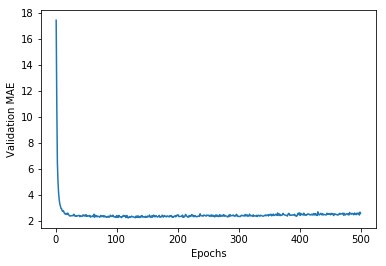

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1 ), average_mae_history )
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

make last model

In [10]:
model = build_model()
model.fit(train_data, train_targets,
         epochs=80, batch_size=16, verbose=0 )
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

102/102 [==============================] - 0s 946us/step


2.962073672051523

In [23]:
def build_model():
    model = models.Sequential()
    model.add( layers.Dense(64, activation=activations.relu, input_shape=(train_data.shape[1], ) ) )
    model.add( layers.Dense(64, activation=activations.relu))
    model.add( layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [24]:
kfold = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [25]:
for train, validation in kfold.split(train_data, train_targets):
    model = build_model()
    hist = model.fit(train_data[train], train_targets[train], 
                     validation_data=(train_data[validation], train_targets[validation]),
                     epochs=epochs_in, batch_size=10)
    k_mae =  "%.4f" % (model.evaluate(train_data[validation], train_targets[validation])[1])
    
    trained_model.append(model)
    mae_history.append(hist.history['val_mean_absolute_error'])
    eval_maes.append(k_mae)

Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 0s 1ms/step - loss: 474.8474 - mean_absolute_error: 19.3814 - val_loss: 310.2678 - val_mean_absolute_error: 16.0216
Epoch 2/500
303/303 [==============================] - 0s 305us/step - loss: 254.9136 - mean_absolute_error: 13.3568 - val_loss: 129.4119 - val_mean_absolute_error: 9.5413
Epoch 3/500
303/303 [==============================] - 0s 280us/step - loss: 102.6365 - mean_absolute_error: 7.7058 - val_loss: 56.1607 - val_mean_absolute_error: 6.0565
Epoch 4/500
303/303 [==============================] - 0s 310us/step - loss: 52.4425 - mean_absolute_error: 5.2753 - val_loss: 32.7096 - val_mean_absolute_error: 4.3901
Epoch 5/500
303/303 [==============================] - 0s 296us/step - loss: 35.1283 - mean_absolute_error: 4.2249 - val_loss: 22.5181 - val_mean_absolute_error: 3.5399
Epoch 6/500
303/303 [==============================] - 0s 304us/step - loss: 27.3679 - mean_absolute_er

303/303 [==============================] - 0s 193us/step - loss: 6.5974 - mean_absolute_error: 1.7624 - val_loss: 9.6212 - val_mean_absolute_error: 2.2780
Epoch 50/500
303/303 [==============================] - 0s 189us/step - loss: 6.9237 - mean_absolute_error: 1.8268 - val_loss: 9.8329 - val_mean_absolute_error: 2.3273
Epoch 51/500
303/303 [==============================] - 0s 194us/step - loss: 6.6363 - mean_absolute_error: 1.7722 - val_loss: 9.6104 - val_mean_absolute_error: 2.2657
Epoch 52/500
303/303 [==============================] - 0s 195us/step - loss: 6.4633 - mean_absolute_error: 1.8208 - val_loss: 9.7703 - val_mean_absolute_error: 2.2701
Epoch 53/500
303/303 [==============================] - 0s 188us/step - loss: 6.5828 - mean_absolute_error: 1.8314 - val_loss: 10.7483 - val_mean_absolute_error: 2.5175
Epoch 54/500
303/303 [==============================] - 0s 185us/step - loss: 6.3255 - mean_absolute_error: 1.8007 - val_loss: 9.8739 - val_mean_absolute_error: 2.3163
Epoc

Epoch 98/500
303/303 [==============================] - 0s 257us/step - loss: 4.3684 - mean_absolute_error: 1.4694 - val_loss: 10.3189 - val_mean_absolute_error: 2.3651
Epoch 99/500
303/303 [==============================] - 0s 233us/step - loss: 4.2994 - mean_absolute_error: 1.4415 - val_loss: 9.9647 - val_mean_absolute_error: 2.2869
Epoch 100/500
303/303 [==============================] - 0s 210us/step - loss: 4.4651 - mean_absolute_error: 1.4575 - val_loss: 9.9025 - val_mean_absolute_error: 2.2912
Epoch 101/500
303/303 [==============================] - 0s 193us/step - loss: 4.1552 - mean_absolute_error: 1.4353 - val_loss: 10.2754 - val_mean_absolute_error: 2.3235
Epoch 102/500
303/303 [==============================] - 0s 199us/step - loss: 4.2038 - mean_absolute_error: 1.4617 - val_loss: 10.6338 - val_mean_absolute_error: 2.4369
Epoch 103/500
303/303 [==============================] - 0s 225us/step - loss: 4.2194 - mean_absolute_error: 1.4018 - val_loss: 11.0404 - val_mean_absolut

303/303 [==============================] - 0s 229us/step - loss: 3.1154 - mean_absolute_error: 1.2143 - val_loss: 12.4306 - val_mean_absolute_error: 2.6324
Epoch 147/500
303/303 [==============================] - 0s 253us/step - loss: 2.9576 - mean_absolute_error: 1.1641 - val_loss: 11.7437 - val_mean_absolute_error: 2.5719
Epoch 148/500
303/303 [==============================] - 0s 248us/step - loss: 2.9733 - mean_absolute_error: 1.2225 - val_loss: 10.8547 - val_mean_absolute_error: 2.3368
Epoch 149/500
303/303 [==============================] - 0s 234us/step - loss: 2.8383 - mean_absolute_error: 1.1692 - val_loss: 13.7671 - val_mean_absolute_error: 2.8246
Epoch 150/500
303/303 [==============================] - 0s 271us/step - loss: 3.0322 - mean_absolute_error: 1.1911 - val_loss: 11.0343 - val_mean_absolute_error: 2.3308
Epoch 151/500
303/303 [==============================] - 0s 234us/step - loss: 2.9010 - mean_absolute_error: 1.1783 - val_loss: 10.9282 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 251us/step - loss: 2.2452 - mean_absolute_error: 1.0189 - val_loss: 11.9458 - val_mean_absolute_error: 2.3788
Epoch 195/500
303/303 [==============================] - 0s 245us/step - loss: 2.2139 - mean_absolute_error: 1.0539 - val_loss: 11.8517 - val_mean_absolute_error: 2.4581
Epoch 196/500
303/303 [==============================] - 0s 246us/step - loss: 2.1503 - mean_absolute_error: 1.0096 - val_loss: 12.1301 - val_mean_absolute_error: 2.4756
Epoch 197/500
303/303 [==============================] - 0s 251us/step - loss: 2.2696 - mean_absolute_error: 1.0069 - val_loss: 11.9966 - val_mean_absolute_error: 2.4837
Epoch 198/500
303/303 [==============================] - 0s 236us/step - loss: 2.1685 - mean_absolute_error: 1.0356 - val_loss: 11.9247 - val_mean_absolute_error: 2.4853
Epoch 199/500
303/303 [==============================] - 0s 224us/step - loss: 2.1543 - mean_absolute_error: 1.0061 - val_loss: 12.4243 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 178us/step - loss: 1.6852 - mean_absolute_error: 0.9159 - val_loss: 12.2435 - val_mean_absolute_error: 2.4211
Epoch 243/500
303/303 [==============================] - 0s 189us/step - loss: 1.6593 - mean_absolute_error: 0.9136 - val_loss: 13.5446 - val_mean_absolute_error: 2.6762
Epoch 244/500
303/303 [==============================] - 0s 190us/step - loss: 1.6049 - mean_absolute_error: 0.9031 - val_loss: 12.1715 - val_mean_absolute_error: 2.4473
Epoch 245/500
303/303 [==============================] - 0s 257us/step - loss: 1.6604 - mean_absolute_error: 0.8988 - val_loss: 12.3684 - val_mean_absolute_error: 2.4481
Epoch 246/500
303/303 [==============================] - 0s 245us/step - loss: 1.6138 - mean_absolute_error: 0.8870 - val_loss: 13.1841 - val_mean_absolute_error: 2.5088
Epoch 247/500
303/303 [==============================] - 0s 243us/step - loss: 1.7725 - mean_absolute_error: 0.9181 - val_loss: 12.5343 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 210us/step - loss: 1.4460 - mean_absolute_error: 0.8490 - val_loss: 12.8969 - val_mean_absolute_error: 2.5209
Epoch 291/500
303/303 [==============================] - 0s 196us/step - loss: 1.3475 - mean_absolute_error: 0.8235 - val_loss: 12.8575 - val_mean_absolute_error: 2.4311
Epoch 292/500
303/303 [==============================] - 0s 230us/step - loss: 1.2106 - mean_absolute_error: 0.8006 - val_loss: 13.0248 - val_mean_absolute_error: 2.5034
Epoch 293/500
303/303 [==============================] - 0s 255us/step - loss: 1.3407 - mean_absolute_error: 0.8261 - val_loss: 13.3709 - val_mean_absolute_error: 2.5717
Epoch 294/500
303/303 [==============================] - 0s 252us/step - loss: 1.2750 - mean_absolute_error: 0.8303 - val_loss: 12.6168 - val_mean_absolute_error: 2.4798
Epoch 295/500
303/303 [==============================] - 0s 245us/step - loss: 1.3672 - mean_absolute_error: 0.8091 - val_loss: 12.3447 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 190us/step - loss: 1.0514 - mean_absolute_error: 0.7494 - val_loss: 13.1605 - val_mean_absolute_error: 2.5324
Epoch 339/500
303/303 [==============================] - 0s 186us/step - loss: 0.9927 - mean_absolute_error: 0.7157 - val_loss: 12.5163 - val_mean_absolute_error: 2.5195
Epoch 340/500
303/303 [==============================] - 0s 177us/step - loss: 0.9508 - mean_absolute_error: 0.7012 - val_loss: 13.0260 - val_mean_absolute_error: 2.5466
Epoch 341/500
303/303 [==============================] - 0s 193us/step - loss: 1.0224 - mean_absolute_error: 0.7434 - val_loss: 14.5246 - val_mean_absolute_error: 2.7428
Epoch 342/500
303/303 [==============================] - 0s 209us/step - loss: 1.0106 - mean_absolute_error: 0.7299 - val_loss: 13.7935 - val_mean_absolute_error: 2.5365
Epoch 343/500
303/303 [==============================] - 0s 194us/step - loss: 0.9663 - mean_absolute_error: 0.7240 - val_loss: 13.9039 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 256us/step - loss: 0.7184 - mean_absolute_error: 0.6237 - val_loss: 13.9552 - val_mean_absolute_error: 2.6928
Epoch 387/500
303/303 [==============================] - 0s 271us/step - loss: 0.8057 - mean_absolute_error: 0.6513 - val_loss: 12.6480 - val_mean_absolute_error: 2.5459
Epoch 388/500
303/303 [==============================] - 0s 263us/step - loss: 0.8401 - mean_absolute_error: 0.6571 - val_loss: 13.8123 - val_mean_absolute_error: 2.6114
Epoch 389/500
303/303 [==============================] - 0s 256us/step - loss: 0.8578 - mean_absolute_error: 0.6670 - val_loss: 13.7756 - val_mean_absolute_error: 2.6386
Epoch 390/500
303/303 [==============================] - 0s 256us/step - loss: 0.8162 - mean_absolute_error: 0.6255 - val_loss: 12.9912 - val_mean_absolute_error: 2.4690
Epoch 391/500
303/303 [==============================] - 0s 270us/step - loss: 0.7276 - mean_absolute_error: 0.6417 - val_loss: 14.0203 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 286us/step - loss: 0.7415 - mean_absolute_error: 0.6479 - val_loss: 13.1175 - val_mean_absolute_error: 2.5549
Epoch 435/500
303/303 [==============================] - 0s 264us/step - loss: 0.7291 - mean_absolute_error: 0.6474 - val_loss: 13.0048 - val_mean_absolute_error: 2.5185
Epoch 436/500
303/303 [==============================] - 0s 238us/step - loss: 0.6933 - mean_absolute_error: 0.6288 - val_loss: 13.1066 - val_mean_absolute_error: 2.5276
Epoch 437/500
303/303 [==============================] - 0s 238us/step - loss: 0.6679 - mean_absolute_error: 0.6320 - val_loss: 12.9028 - val_mean_absolute_error: 2.5380
Epoch 438/500
303/303 [==============================] - 0s 255us/step - loss: 0.6720 - mean_absolute_error: 0.6098 - val_loss: 13.1407 - val_mean_absolute_error: 2.5533
Epoch 439/500
303/303 [==============================] - 0s 274us/step - loss: 0.7109 - mean_absolute_error: 0.6274 - val_loss: 13.5284 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 259us/step - loss: 0.5402 - mean_absolute_error: 0.5360 - val_loss: 12.9772 - val_mean_absolute_error: 2.5164
Epoch 483/500
303/303 [==============================] - 0s 276us/step - loss: 0.7389 - mean_absolute_error: 0.6313 - val_loss: 13.1901 - val_mean_absolute_error: 2.6249
Epoch 484/500
303/303 [==============================] - 0s 275us/step - loss: 0.6161 - mean_absolute_error: 0.5688 - val_loss: 12.9678 - val_mean_absolute_error: 2.5266
Epoch 485/500
303/303 [==============================] - 0s 269us/step - loss: 0.6102 - mean_absolute_error: 0.5652 - val_loss: 13.0767 - val_mean_absolute_error: 2.5510
Epoch 486/500
303/303 [==============================] - 0s 258us/step - loss: 0.5588 - mean_absolute_error: 0.5650 - val_loss: 12.4838 - val_mean_absolute_error: 2.4935
Epoch 487/500
303/303 [==============================] - 0s 260us/step - loss: 0.5763 - mean_absolute_error: 0.5694 - val_loss: 14.4153 - val_mean_absolute_error: 2

Epoch 30/500
303/303 [==============================] - 0s 252us/step - loss: 9.2449 - mean_absolute_error: 2.0770 - val_loss: 11.4168 - val_mean_absolute_error: 2.5171
Epoch 31/500
303/303 [==============================] - 0s 264us/step - loss: 9.0867 - mean_absolute_error: 2.1002 - val_loss: 11.3540 - val_mean_absolute_error: 2.4992
Epoch 32/500
303/303 [==============================] - 0s 275us/step - loss: 9.0491 - mean_absolute_error: 2.0739 - val_loss: 11.3976 - val_mean_absolute_error: 2.4979
Epoch 33/500
303/303 [==============================] - 0s 288us/step - loss: 8.8409 - mean_absolute_error: 2.0669 - val_loss: 11.8646 - val_mean_absolute_error: 2.5346
Epoch 34/500
303/303 [==============================] - 0s 272us/step - loss: 8.7955 - mean_absolute_error: 2.0479 - val_loss: 11.7136 - val_mean_absolute_error: 2.5432
Epoch 35/500
303/303 [==============================] - 0s 236us/step - loss: 8.6447 - mean_absolute_error: 2.0505 - val_loss: 12.5422 - val_mean_absolute_

303/303 [==============================] - 0s 189us/step - loss: 5.9536 - mean_absolute_error: 1.6744 - val_loss: 10.6256 - val_mean_absolute_error: 2.4053
Epoch 79/500
303/303 [==============================] - 0s 191us/step - loss: 5.9559 - mean_absolute_error: 1.6703 - val_loss: 10.9364 - val_mean_absolute_error: 2.4599
Epoch 80/500
303/303 [==============================] - 0s 186us/step - loss: 5.7373 - mean_absolute_error: 1.6328 - val_loss: 11.4686 - val_mean_absolute_error: 2.5175
Epoch 81/500
303/303 [==============================] - 0s 186us/step - loss: 5.8443 - mean_absolute_error: 1.6298 - val_loss: 11.0417 - val_mean_absolute_error: 2.4512
Epoch 82/500
303/303 [==============================] - 0s 183us/step - loss: 5.7063 - mean_absolute_error: 1.6666 - val_loss: 10.7146 - val_mean_absolute_error: 2.4162
Epoch 83/500
303/303 [==============================] - 0s 193us/step - loss: 5.7598 - mean_absolute_error: 1.6346 - val_loss: 10.6878 - val_mean_absolute_error: 2.4292

303/303 [==============================] - 0s 218us/step - loss: 3.8954 - mean_absolute_error: 1.3886 - val_loss: 9.5505 - val_mean_absolute_error: 2.3050
Epoch 127/500
303/303 [==============================] - 0s 203us/step - loss: 4.2189 - mean_absolute_error: 1.4001 - val_loss: 10.5588 - val_mean_absolute_error: 2.4300
Epoch 128/500
303/303 [==============================] - 0s 174us/step - loss: 3.9185 - mean_absolute_error: 1.3620 - val_loss: 10.4156 - val_mean_absolute_error: 2.3751
Epoch 129/500
303/303 [==============================] - 0s 173us/step - loss: 3.8947 - mean_absolute_error: 1.3660 - val_loss: 11.3854 - val_mean_absolute_error: 2.4588
Epoch 130/500
303/303 [==============================] - 0s 170us/step - loss: 3.9985 - mean_absolute_error: 1.3887 - val_loss: 10.9041 - val_mean_absolute_error: 2.4604
Epoch 131/500
303/303 [==============================] - 0s 169us/step - loss: 3.9311 - mean_absolute_error: 1.3901 - val_loss: 11.3934 - val_mean_absolute_error: 2.

303/303 [==============================] - 0s 250us/step - loss: 2.8713 - mean_absolute_error: 1.1309 - val_loss: 10.1363 - val_mean_absolute_error: 2.3698
Epoch 175/500
303/303 [==============================] - 0s 241us/step - loss: 2.8379 - mean_absolute_error: 1.1996 - val_loss: 10.6706 - val_mean_absolute_error: 2.3760
Epoch 176/500
303/303 [==============================] - 0s 231us/step - loss: 2.8940 - mean_absolute_error: 1.1847 - val_loss: 10.6114 - val_mean_absolute_error: 2.3900
Epoch 177/500
303/303 [==============================] - 0s 203us/step - loss: 2.9507 - mean_absolute_error: 1.1925 - val_loss: 10.1701 - val_mean_absolute_error: 2.3825
Epoch 178/500
303/303 [==============================] - 0s 192us/step - loss: 2.9139 - mean_absolute_error: 1.2030 - val_loss: 9.7068 - val_mean_absolute_error: 2.2670
Epoch 179/500
303/303 [==============================] - 0s 226us/step - loss: 2.9346 - mean_absolute_error: 1.1777 - val_loss: 10.1388 - val_mean_absolute_error: 2.

303/303 [==============================] - 0s 238us/step - loss: 2.1784 - mean_absolute_error: 1.0501 - val_loss: 11.2859 - val_mean_absolute_error: 2.3626
Epoch 223/500
303/303 [==============================] - 0s 244us/step - loss: 2.1163 - mean_absolute_error: 1.0162 - val_loss: 10.7003 - val_mean_absolute_error: 2.3244
Epoch 224/500
303/303 [==============================] - 0s 244us/step - loss: 2.1484 - mean_absolute_error: 1.0167 - val_loss: 10.2447 - val_mean_absolute_error: 2.2199
Epoch 225/500
303/303 [==============================] - 0s 257us/step - loss: 2.1356 - mean_absolute_error: 1.0037 - val_loss: 11.1312 - val_mean_absolute_error: 2.3846
Epoch 226/500
303/303 [==============================] - 0s 254us/step - loss: 2.1558 - mean_absolute_error: 1.0359 - val_loss: 12.2345 - val_mean_absolute_error: 2.4881
Epoch 227/500
303/303 [==============================] - 0s 209us/step - loss: 2.1947 - mean_absolute_error: 1.0316 - val_loss: 10.5438 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 205us/step - loss: 1.6274 - mean_absolute_error: 0.9074 - val_loss: 11.9884 - val_mean_absolute_error: 2.4771
Epoch 271/500
303/303 [==============================] - 0s 202us/step - loss: 1.6461 - mean_absolute_error: 0.9188 - val_loss: 11.9619 - val_mean_absolute_error: 2.4062
Epoch 272/500
303/303 [==============================] - 0s 243us/step - loss: 1.6540 - mean_absolute_error: 0.9199 - val_loss: 11.4009 - val_mean_absolute_error: 2.3546
Epoch 273/500
303/303 [==============================] - 0s 212us/step - loss: 1.6683 - mean_absolute_error: 0.9011 - val_loss: 12.3572 - val_mean_absolute_error: 2.4171
Epoch 274/500
303/303 [==============================] - 0s 192us/step - loss: 1.6048 - mean_absolute_error: 0.9017 - val_loss: 13.3295 - val_mean_absolute_error: 2.4647
Epoch 275/500
303/303 [==============================] - 0s 196us/step - loss: 1.6059 - mean_absolute_error: 0.8961 - val_loss: 10.9937 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 260us/step - loss: 1.3638 - mean_absolute_error: 0.7928 - val_loss: 12.9132 - val_mean_absolute_error: 2.3587
Epoch 319/500
303/303 [==============================] - 0s 249us/step - loss: 1.2114 - mean_absolute_error: 0.8138 - val_loss: 13.2543 - val_mean_absolute_error: 2.5642
Epoch 320/500
303/303 [==============================] - 0s 234us/step - loss: 1.3840 - mean_absolute_error: 0.8577 - val_loss: 12.5471 - val_mean_absolute_error: 2.2963
Epoch 321/500
303/303 [==============================] - 0s 228us/step - loss: 1.3708 - mean_absolute_error: 0.8311 - val_loss: 13.2105 - val_mean_absolute_error: 2.5068
Epoch 322/500
303/303 [==============================] - 0s 271us/step - loss: 1.2736 - mean_absolute_error: 0.8162 - val_loss: 14.1027 - val_mean_absolute_error: 2.5651
Epoch 323/500
303/303 [==============================] - 0s 264us/step - loss: 1.3115 - mean_absolute_error: 0.8120 - val_loss: 12.4966 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 261us/step - loss: 1.1242 - mean_absolute_error: 0.7868 - val_loss: 13.8837 - val_mean_absolute_error: 2.5064
Epoch 367/500
303/303 [==============================] - 0s 267us/step - loss: 0.9491 - mean_absolute_error: 0.7000 - val_loss: 12.7078 - val_mean_absolute_error: 2.5353
Epoch 368/500
303/303 [==============================] - 0s 270us/step - loss: 1.2325 - mean_absolute_error: 0.7716 - val_loss: 14.9381 - val_mean_absolute_error: 2.5188
Epoch 369/500
303/303 [==============================] - 0s 268us/step - loss: 1.1279 - mean_absolute_error: 0.7541 - val_loss: 14.2218 - val_mean_absolute_error: 2.5331
Epoch 370/500
303/303 [==============================] - 0s 241us/step - loss: 0.9813 - mean_absolute_error: 0.7128 - val_loss: 13.5012 - val_mean_absolute_error: 2.4491
Epoch 371/500
303/303 [==============================] - 0s 251us/step - loss: 1.1215 - mean_absolute_error: 0.7497 - val_loss: 14.5599 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 260us/step - loss: 0.9090 - mean_absolute_error: 0.6988 - val_loss: 15.7328 - val_mean_absolute_error: 2.6288
Epoch 415/500
303/303 [==============================] - 0s 270us/step - loss: 0.9063 - mean_absolute_error: 0.6991 - val_loss: 15.8854 - val_mean_absolute_error: 2.6152
Epoch 416/500
303/303 [==============================] - 0s 290us/step - loss: 0.8866 - mean_absolute_error: 0.6787 - val_loss: 14.2980 - val_mean_absolute_error: 2.5961
Epoch 417/500
303/303 [==============================] - 0s 286us/step - loss: 0.9182 - mean_absolute_error: 0.6766 - val_loss: 16.0907 - val_mean_absolute_error: 2.6237
Epoch 418/500
303/303 [==============================] - 0s 268us/step - loss: 0.9597 - mean_absolute_error: 0.7145 - val_loss: 16.4181 - val_mean_absolute_error: 2.6810
Epoch 419/500
303/303 [==============================] - 0s 227us/step - loss: 0.8941 - mean_absolute_error: 0.6995 - val_loss: 15.4055 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 239us/step - loss: 0.7583 - mean_absolute_error: 0.6255 - val_loss: 14.8818 - val_mean_absolute_error: 2.4763
Epoch 463/500
303/303 [==============================] - 0s 251us/step - loss: 0.8363 - mean_absolute_error: 0.6789 - val_loss: 16.0164 - val_mean_absolute_error: 2.6083
Epoch 464/500
303/303 [==============================] - 0s 252us/step - loss: 0.7015 - mean_absolute_error: 0.5953 - val_loss: 15.9674 - val_mean_absolute_error: 2.6842
Epoch 465/500
303/303 [==============================] - 0s 255us/step - loss: 0.7235 - mean_absolute_error: 0.6378 - val_loss: 13.7635 - val_mean_absolute_error: 2.5104
Epoch 466/500
303/303 [==============================] - 0s 255us/step - loss: 0.8370 - mean_absolute_error: 0.6587 - val_loss: 17.9536 - val_mean_absolute_error: 2.8494
Epoch 467/500
303/303 [==============================] - 0s 252us/step - loss: 0.7938 - mean_absolute_error: 0.6233 - val_loss: 16.8280 - val_mean_absolute_error: 2

Epoch 10/500
303/303 [==============================] - 0s 183us/step - loss: 17.3933 - mean_absolute_error: 2.8294 - val_loss: 24.4348 - val_mean_absolute_error: 3.0999
Epoch 11/500
303/303 [==============================] - 0s 173us/step - loss: 16.5081 - mean_absolute_error: 2.8207 - val_loss: 22.4623 - val_mean_absolute_error: 2.9174
Epoch 12/500
303/303 [==============================] - 0s 176us/step - loss: 15.6530 - mean_absolute_error: 2.7050 - val_loss: 21.2111 - val_mean_absolute_error: 2.7131
Epoch 13/500
303/303 [==============================] - 0s 214us/step - loss: 14.5952 - mean_absolute_error: 2.6089 - val_loss: 19.8450 - val_mean_absolute_error: 2.7151
Epoch 14/500
303/303 [==============================] - 0s 213us/step - loss: 13.8930 - mean_absolute_error: 2.5826 - val_loss: 19.9249 - val_mean_absolute_error: 2.7019
Epoch 15/500
303/303 [==============================] - 0s 212us/step - loss: 13.2769 - mean_absolute_error: 2.4907 - val_loss: 18.4341 - val_mean_abs

303/303 [==============================] - 0s 196us/step - loss: 6.8407 - mean_absolute_error: 1.8091 - val_loss: 11.2839 - val_mean_absolute_error: 2.1391
Epoch 59/500
303/303 [==============================] - 0s 180us/step - loss: 6.8984 - mean_absolute_error: 1.8490 - val_loss: 11.6509 - val_mean_absolute_error: 2.1792
Epoch 60/500
303/303 [==============================] - 0s 196us/step - loss: 6.7626 - mean_absolute_error: 1.8109 - val_loss: 11.0390 - val_mean_absolute_error: 2.1128
Epoch 61/500
303/303 [==============================] - 0s 219us/step - loss: 6.8786 - mean_absolute_error: 1.8353 - val_loss: 11.0871 - val_mean_absolute_error: 2.1295
Epoch 62/500
303/303 [==============================] - 0s 253us/step - loss: 6.5457 - mean_absolute_error: 1.7728 - val_loss: 11.3940 - val_mean_absolute_error: 2.1897
Epoch 63/500
303/303 [==============================] - 0s 233us/step - loss: 6.8606 - mean_absolute_error: 1.8110 - val_loss: 11.4058 - val_mean_absolute_error: 2.1045

303/303 [==============================] - 0s 187us/step - loss: 4.8320 - mean_absolute_error: 1.5449 - val_loss: 10.6891 - val_mean_absolute_error: 2.0578
Epoch 107/500
303/303 [==============================] - 0s 192us/step - loss: 4.8748 - mean_absolute_error: 1.4993 - val_loss: 9.9969 - val_mean_absolute_error: 2.0461
Epoch 108/500
303/303 [==============================] - 0s 194us/step - loss: 4.7909 - mean_absolute_error: 1.5416 - val_loss: 10.2412 - val_mean_absolute_error: 2.2158
Epoch 109/500
303/303 [==============================] - 0s 207us/step - loss: 4.7490 - mean_absolute_error: 1.5502 - val_loss: 10.4573 - val_mean_absolute_error: 2.0188
Epoch 110/500
303/303 [==============================] - 0s 248us/step - loss: 4.9168 - mean_absolute_error: 1.4896 - val_loss: 10.2098 - val_mean_absolute_error: 2.0894
Epoch 111/500
303/303 [==============================] - 0s 227us/step - loss: 4.7115 - mean_absolute_error: 1.5134 - val_loss: 10.6254 - val_mean_absolute_error: 2.

303/303 [==============================] - 0s 201us/step - loss: 3.2806 - mean_absolute_error: 1.2600 - val_loss: 10.0119 - val_mean_absolute_error: 2.0364
Epoch 155/500
303/303 [==============================] - 0s 193us/step - loss: 3.3110 - mean_absolute_error: 1.2213 - val_loss: 10.5079 - val_mean_absolute_error: 2.0608
Epoch 156/500
303/303 [==============================] - 0s 189us/step - loss: 3.2959 - mean_absolute_error: 1.2378 - val_loss: 10.9240 - val_mean_absolute_error: 2.2387
Epoch 157/500
303/303 [==============================] - 0s 184us/step - loss: 3.3316 - mean_absolute_error: 1.2430 - val_loss: 10.5386 - val_mean_absolute_error: 2.0153
Epoch 158/500
303/303 [==============================] - 0s 179us/step - loss: 3.3504 - mean_absolute_error: 1.2629 - val_loss: 10.0347 - val_mean_absolute_error: 2.0387
Epoch 159/500
303/303 [==============================] - 0s 178us/step - loss: 3.2714 - mean_absolute_error: 1.2355 - val_loss: 9.7099 - val_mean_absolute_error: 2.

303/303 [==============================] - 0s 198us/step - loss: 2.4857 - mean_absolute_error: 1.0834 - val_loss: 10.2596 - val_mean_absolute_error: 2.1631
Epoch 203/500
303/303 [==============================] - 0s 196us/step - loss: 2.3049 - mean_absolute_error: 1.0297 - val_loss: 10.5265 - val_mean_absolute_error: 2.1852
Epoch 204/500
303/303 [==============================] - 0s 208us/step - loss: 2.3681 - mean_absolute_error: 1.0809 - val_loss: 11.2360 - val_mean_absolute_error: 2.1032
Epoch 205/500
303/303 [==============================] - 0s 266us/step - loss: 2.3653 - mean_absolute_error: 1.0570 - val_loss: 10.4289 - val_mean_absolute_error: 2.0953
Epoch 206/500
303/303 [==============================] - 0s 291us/step - loss: 2.3178 - mean_absolute_error: 1.0294 - val_loss: 10.2557 - val_mean_absolute_error: 2.1500
Epoch 207/500
303/303 [==============================] - 0s 285us/step - loss: 2.3478 - mean_absolute_error: 1.0809 - val_loss: 10.5352 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 203us/step - loss: 1.6727 - mean_absolute_error: 0.9251 - val_loss: 10.4593 - val_mean_absolute_error: 2.0817
Epoch 251/500
303/303 [==============================] - 0s 204us/step - loss: 1.6590 - mean_absolute_error: 0.8953 - val_loss: 10.1967 - val_mean_absolute_error: 2.0889
Epoch 252/500
303/303 [==============================] - 0s 216us/step - loss: 1.8043 - mean_absolute_error: 0.9317 - val_loss: 10.7120 - val_mean_absolute_error: 2.1184
Epoch 253/500
303/303 [==============================] - 0s 233us/step - loss: 1.7944 - mean_absolute_error: 0.9317 - val_loss: 10.4622 - val_mean_absolute_error: 2.1068
Epoch 254/500
303/303 [==============================] - 0s 258us/step - loss: 1.7059 - mean_absolute_error: 0.8917 - val_loss: 10.7200 - val_mean_absolute_error: 2.0871
Epoch 255/500
303/303 [==============================] - 0s 257us/step - loss: 1.7441 - mean_absolute_error: 0.9115 - val_loss: 10.2318 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 181us/step - loss: 1.3465 - mean_absolute_error: 0.8001 - val_loss: 10.7682 - val_mean_absolute_error: 2.1717
Epoch 299/500
303/303 [==============================] - 0s 265us/step - loss: 1.3268 - mean_absolute_error: 0.8052 - val_loss: 12.1140 - val_mean_absolute_error: 2.2522
Epoch 300/500
303/303 [==============================] - 0s 229us/step - loss: 1.3625 - mean_absolute_error: 0.8062 - val_loss: 10.1431 - val_mean_absolute_error: 2.1680
Epoch 301/500
303/303 [==============================] - 0s 206us/step - loss: 1.3166 - mean_absolute_error: 0.7890 - val_loss: 9.9074 - val_mean_absolute_error: 2.1170
Epoch 302/500
303/303 [==============================] - 0s 194us/step - loss: 1.2191 - mean_absolute_error: 0.8014 - val_loss: 11.0099 - val_mean_absolute_error: 2.4103
Epoch 303/500
303/303 [==============================] - 0s 220us/step - loss: 1.2855 - mean_absolute_error: 0.7992 - val_loss: 12.1194 - val_mean_absolute_error: 2.

303/303 [==============================] - 0s 240us/step - loss: 1.1276 - mean_absolute_error: 0.7453 - val_loss: 10.2779 - val_mean_absolute_error: 2.2544
Epoch 347/500
303/303 [==============================] - 0s 220us/step - loss: 1.0053 - mean_absolute_error: 0.6968 - val_loss: 10.3074 - val_mean_absolute_error: 2.3373
Epoch 348/500
303/303 [==============================] - 0s 183us/step - loss: 1.0775 - mean_absolute_error: 0.7243 - val_loss: 11.1091 - val_mean_absolute_error: 2.4320
Epoch 349/500
303/303 [==============================] - 0s 173us/step - loss: 1.0210 - mean_absolute_error: 0.6977 - val_loss: 10.2740 - val_mean_absolute_error: 2.1667
Epoch 350/500
303/303 [==============================] - 0s 173us/step - loss: 0.8869 - mean_absolute_error: 0.6665 - val_loss: 10.5521 - val_mean_absolute_error: 2.2323
Epoch 351/500
303/303 [==============================] - 0s 173us/step - loss: 1.0129 - mean_absolute_error: 0.6928 - val_loss: 10.6385 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 267us/step - loss: 0.7729 - mean_absolute_error: 0.6325 - val_loss: 11.4182 - val_mean_absolute_error: 2.2966
Epoch 395/500
303/303 [==============================] - 0s 275us/step - loss: 0.7730 - mean_absolute_error: 0.6275 - val_loss: 11.0635 - val_mean_absolute_error: 2.2538
Epoch 396/500
303/303 [==============================] - 0s 264us/step - loss: 0.8144 - mean_absolute_error: 0.6580 - val_loss: 11.9868 - val_mean_absolute_error: 2.3387
Epoch 397/500
303/303 [==============================] - 0s 233us/step - loss: 0.7908 - mean_absolute_error: 0.6519 - val_loss: 10.8903 - val_mean_absolute_error: 2.2855
Epoch 398/500
303/303 [==============================] - 0s 263us/step - loss: 0.7581 - mean_absolute_error: 0.6145 - val_loss: 10.6928 - val_mean_absolute_error: 2.2556
Epoch 399/500
303/303 [==============================] - 0s 281us/step - loss: 0.7440 - mean_absolute_error: 0.6192 - val_loss: 10.6378 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 269us/step - loss: 0.7565 - mean_absolute_error: 0.6014 - val_loss: 11.0829 - val_mean_absolute_error: 2.2666
Epoch 443/500
303/303 [==============================] - 0s 266us/step - loss: 0.7236 - mean_absolute_error: 0.5896 - val_loss: 10.4856 - val_mean_absolute_error: 2.2346
Epoch 444/500
303/303 [==============================] - 0s 243us/step - loss: 0.6129 - mean_absolute_error: 0.5683 - val_loss: 11.4642 - val_mean_absolute_error: 2.3325
Epoch 445/500
303/303 [==============================] - 0s 216us/step - loss: 0.7467 - mean_absolute_error: 0.6148 - val_loss: 11.1529 - val_mean_absolute_error: 2.3473
Epoch 446/500
303/303 [==============================] - 0s 207us/step - loss: 0.5987 - mean_absolute_error: 0.5379 - val_loss: 9.5508 - val_mean_absolute_error: 2.1754
Epoch 447/500
303/303 [==============================] - 0s 271us/step - loss: 0.7125 - mean_absolute_error: 0.6106 - val_loss: 12.5450 - val_mean_absolute_error: 2.

303/303 [==============================] - 0s 185us/step - loss: 0.6008 - mean_absolute_error: 0.5722 - val_loss: 12.0119 - val_mean_absolute_error: 2.4317
Epoch 491/500
303/303 [==============================] - 0s 189us/step - loss: 0.6362 - mean_absolute_error: 0.5344 - val_loss: 10.7093 - val_mean_absolute_error: 2.2596
Epoch 492/500
303/303 [==============================] - 0s 202us/step - loss: 0.5710 - mean_absolute_error: 0.5368 - val_loss: 10.6850 - val_mean_absolute_error: 2.2436
Epoch 493/500
303/303 [==============================] - 0s 197us/step - loss: 0.5796 - mean_absolute_error: 0.5361 - val_loss: 10.6788 - val_mean_absolute_error: 2.3330
Epoch 494/500
303/303 [==============================] - 0s 188us/step - loss: 0.6124 - mean_absolute_error: 0.5549 - val_loss: 10.9697 - val_mean_absolute_error: 2.3319
Epoch 495/500
303/303 [==============================] - 0s 191us/step - loss: 0.5759 - mean_absolute_error: 0.5482 - val_loss: 10.4603 - val_mean_absolute_error: 2

Epoch 38/500
303/303 [==============================] - 0s 285us/step - loss: 6.6995 - mean_absolute_error: 1.8589 - val_loss: 14.7135 - val_mean_absolute_error: 2.5992
Epoch 39/500
303/303 [==============================] - 0s 288us/step - loss: 6.8948 - mean_absolute_error: 1.8261 - val_loss: 13.3924 - val_mean_absolute_error: 2.5839
Epoch 40/500
303/303 [==============================] - 0s 283us/step - loss: 6.6663 - mean_absolute_error: 1.8560 - val_loss: 13.4294 - val_mean_absolute_error: 2.5650
Epoch 41/500
303/303 [==============================] - 0s 268us/step - loss: 6.5041 - mean_absolute_error: 1.8252 - val_loss: 13.4306 - val_mean_absolute_error: 2.6353
Epoch 42/500
303/303 [==============================] - 0s 258us/step - loss: 6.4424 - mean_absolute_error: 1.8072 - val_loss: 13.6220 - val_mean_absolute_error: 2.5813
Epoch 43/500
303/303 [==============================] - 0s 293us/step - loss: 6.3314 - mean_absolute_error: 1.8052 - val_loss: 13.3910 - val_mean_absolute_

303/303 [==============================] - 0s 233us/step - loss: 4.3678 - mean_absolute_error: 1.5020 - val_loss: 12.9872 - val_mean_absolute_error: 2.5762
Epoch 87/500
303/303 [==============================] - 0s 244us/step - loss: 4.4054 - mean_absolute_error: 1.4678 - val_loss: 13.7445 - val_mean_absolute_error: 2.5702
Epoch 88/500
303/303 [==============================] - 0s 260us/step - loss: 4.3827 - mean_absolute_error: 1.4969 - val_loss: 13.6600 - val_mean_absolute_error: 2.7459
Epoch 89/500
303/303 [==============================] - 0s 242us/step - loss: 4.2222 - mean_absolute_error: 1.4622 - val_loss: 12.9632 - val_mean_absolute_error: 2.5625
Epoch 90/500
303/303 [==============================] - 0s 229us/step - loss: 4.2667 - mean_absolute_error: 1.4737 - val_loss: 13.5617 - val_mean_absolute_error: 2.5188
Epoch 91/500
303/303 [==============================] - 0s 227us/step - loss: 4.1906 - mean_absolute_error: 1.4359 - val_loss: 14.0216 - val_mean_absolute_error: 2.7712

303/303 [==============================] - 0s 272us/step - loss: 3.1387 - mean_absolute_error: 1.2278 - val_loss: 15.1404 - val_mean_absolute_error: 2.7662
Epoch 135/500
303/303 [==============================] - 0s 253us/step - loss: 2.9990 - mean_absolute_error: 1.2373 - val_loss: 14.1390 - val_mean_absolute_error: 2.7043
Epoch 136/500
303/303 [==============================] - 0s 225us/step - loss: 3.0682 - mean_absolute_error: 1.2263 - val_loss: 13.8501 - val_mean_absolute_error: 2.6332
Epoch 137/500
303/303 [==============================] - 0s 245us/step - loss: 2.9462 - mean_absolute_error: 1.2272 - val_loss: 15.3815 - val_mean_absolute_error: 2.8161
Epoch 138/500
303/303 [==============================] - 0s 262us/step - loss: 2.9666 - mean_absolute_error: 1.2276 - val_loss: 14.2855 - val_mean_absolute_error: 2.6577
Epoch 139/500
303/303 [==============================] - 0s 218us/step - loss: 2.9447 - mean_absolute_error: 1.2133 - val_loss: 15.7894 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 215us/step - loss: 2.2458 - mean_absolute_error: 1.0427 - val_loss: 14.7525 - val_mean_absolute_error: 2.6523
Epoch 183/500
303/303 [==============================] - 0s 212us/step - loss: 2.1796 - mean_absolute_error: 1.0708 - val_loss: 14.4985 - val_mean_absolute_error: 2.6730
Epoch 184/500
303/303 [==============================] - 0s 199us/step - loss: 2.1173 - mean_absolute_error: 1.0521 - val_loss: 14.7452 - val_mean_absolute_error: 2.7075
Epoch 185/500
303/303 [==============================] - 0s 223us/step - loss: 2.2044 - mean_absolute_error: 1.0705 - val_loss: 15.4120 - val_mean_absolute_error: 2.7576
Epoch 186/500
303/303 [==============================] - 0s 244us/step - loss: 2.1834 - mean_absolute_error: 1.0615 - val_loss: 15.7190 - val_mean_absolute_error: 2.8515
Epoch 187/500
303/303 [==============================] - 0s 245us/step - loss: 2.1959 - mean_absolute_error: 1.0650 - val_loss: 14.9691 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 228us/step - loss: 1.5678 - mean_absolute_error: 0.9213 - val_loss: 15.1711 - val_mean_absolute_error: 2.6417
Epoch 231/500
303/303 [==============================] - 0s 253us/step - loss: 1.6839 - mean_absolute_error: 0.9404 - val_loss: 16.8586 - val_mean_absolute_error: 2.9534
Epoch 232/500
303/303 [==============================] - 0s 277us/step - loss: 1.7441 - mean_absolute_error: 0.9527 - val_loss: 16.0198 - val_mean_absolute_error: 2.8191
Epoch 233/500
303/303 [==============================] - 0s 250us/step - loss: 1.5889 - mean_absolute_error: 0.9022 - val_loss: 15.4139 - val_mean_absolute_error: 2.7654
Epoch 234/500
303/303 [==============================] - 0s 218us/step - loss: 1.5569 - mean_absolute_error: 0.9151 - val_loss: 17.8004 - val_mean_absolute_error: 3.0354
Epoch 235/500
303/303 [==============================] - 0s 212us/step - loss: 1.5819 - mean_absolute_error: 0.8991 - val_loss: 16.5230 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 184us/step - loss: 1.2173 - mean_absolute_error: 0.8105 - val_loss: 16.9787 - val_mean_absolute_error: 2.8937
Epoch 279/500
303/303 [==============================] - 0s 190us/step - loss: 1.3510 - mean_absolute_error: 0.8338 - val_loss: 17.6737 - val_mean_absolute_error: 2.8812
Epoch 280/500
303/303 [==============================] - 0s 189us/step - loss: 1.2927 - mean_absolute_error: 0.8422 - val_loss: 17.1458 - val_mean_absolute_error: 2.8583
Epoch 281/500
303/303 [==============================] - 0s 193us/step - loss: 1.2746 - mean_absolute_error: 0.8062 - val_loss: 16.8564 - val_mean_absolute_error: 2.8078
Epoch 282/500
303/303 [==============================] - 0s 188us/step - loss: 1.3240 - mean_absolute_error: 0.8233 - val_loss: 16.9193 - val_mean_absolute_error: 2.7985
Epoch 283/500
303/303 [==============================] - 0s 182us/step - loss: 1.3071 - mean_absolute_error: 0.8219 - val_loss: 16.9089 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 215us/step - loss: 1.0060 - mean_absolute_error: 0.7138 - val_loss: 17.9602 - val_mean_absolute_error: 2.8857
Epoch 327/500
303/303 [==============================] - 0s 201us/step - loss: 1.0784 - mean_absolute_error: 0.7498 - val_loss: 16.8721 - val_mean_absolute_error: 2.7979
Epoch 328/500
303/303 [==============================] - 0s 218us/step - loss: 1.0583 - mean_absolute_error: 0.7299 - val_loss: 17.7037 - val_mean_absolute_error: 2.8852
Epoch 329/500
303/303 [==============================] - 0s 226us/step - loss: 0.9346 - mean_absolute_error: 0.7010 - val_loss: 18.5554 - val_mean_absolute_error: 3.0033
Epoch 330/500
303/303 [==============================] - 0s 282us/step - loss: 1.0644 - mean_absolute_error: 0.7608 - val_loss: 17.8952 - val_mean_absolute_error: 2.9406
Epoch 331/500
303/303 [==============================] - 0s 269us/step - loss: 0.9719 - mean_absolute_error: 0.6848 - val_loss: 17.9743 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 205us/step - loss: 0.9298 - mean_absolute_error: 0.6846 - val_loss: 19.1699 - val_mean_absolute_error: 3.0514
Epoch 375/500
303/303 [==============================] - 0s 219us/step - loss: 0.8724 - mean_absolute_error: 0.6882 - val_loss: 17.2692 - val_mean_absolute_error: 2.8627
Epoch 376/500
303/303 [==============================] - 0s 220us/step - loss: 0.8638 - mean_absolute_error: 0.6757 - val_loss: 17.4697 - val_mean_absolute_error: 2.8496
Epoch 377/500
303/303 [==============================] - 0s 222us/step - loss: 0.8930 - mean_absolute_error: 0.6665 - val_loss: 18.4358 - val_mean_absolute_error: 3.0114
Epoch 378/500
303/303 [==============================] - 0s 203us/step - loss: 0.8285 - mean_absolute_error: 0.6556 - val_loss: 17.9043 - val_mean_absolute_error: 2.9307
Epoch 379/500
303/303 [==============================] - 0s 188us/step - loss: 0.8350 - mean_absolute_error: 0.6585 - val_loss: 17.5277 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 251us/step - loss: 0.7166 - mean_absolute_error: 0.5973 - val_loss: 17.3423 - val_mean_absolute_error: 2.8690
Epoch 423/500
303/303 [==============================] - 0s 275us/step - loss: 0.7632 - mean_absolute_error: 0.6473 - val_loss: 18.4434 - val_mean_absolute_error: 2.9619
Epoch 424/500
303/303 [==============================] - 0s 277us/step - loss: 0.6436 - mean_absolute_error: 0.5829 - val_loss: 19.6006 - val_mean_absolute_error: 3.0496
Epoch 425/500
303/303 [==============================] - 0s 282us/step - loss: 0.7951 - mean_absolute_error: 0.6360 - val_loss: 17.1799 - val_mean_absolute_error: 2.8538
Epoch 426/500
303/303 [==============================] - 0s 246us/step - loss: 0.7370 - mean_absolute_error: 0.6110 - val_loss: 17.5731 - val_mean_absolute_error: 2.8776
Epoch 427/500
303/303 [==============================] - 0s 215us/step - loss: 0.8253 - mean_absolute_error: 0.6603 - val_loss: 19.0769 - val_mean_absolute_error: 3

303/303 [==============================] - 0s 232us/step - loss: 0.6517 - mean_absolute_error: 0.5975 - val_loss: 17.9980 - val_mean_absolute_error: 2.9245
Epoch 471/500
303/303 [==============================] - 0s 222us/step - loss: 0.6043 - mean_absolute_error: 0.5702 - val_loss: 19.2935 - val_mean_absolute_error: 3.0405
Epoch 472/500
303/303 [==============================] - 0s 245us/step - loss: 0.6254 - mean_absolute_error: 0.5791 - val_loss: 18.3250 - val_mean_absolute_error: 2.9585
Epoch 473/500
303/303 [==============================] - 0s 256us/step - loss: 0.5883 - mean_absolute_error: 0.5561 - val_loss: 17.5920 - val_mean_absolute_error: 2.8503
Epoch 474/500
303/303 [==============================] - 0s 248us/step - loss: 0.6819 - mean_absolute_error: 0.6017 - val_loss: 17.1937 - val_mean_absolute_error: 2.7976
Epoch 475/500
303/303 [==============================] - 0s 252us/step - loss: 0.5932 - mean_absolute_error: 0.5468 - val_loss: 17.4035 - val_mean_absolute_error: 2

In [26]:
for train, validation in kfold.split(train_data, train_targets):
    print("--------------------------------")
    print(str(train))
    print("--------------------------------")
    print(str(validation))
    print("--------------------------------")
    

--------------------------------
[  0   1   2   4   5   6   7   8   9  10  11  12  13  15  16  17  18  19
  20  21  23  24  25  27  29  31  32  33  34  35  36  37  38  39  40  42
  43  44  45  46  47  48  49  54  55  58  61  62  63  64  67  68  69  70
  71  72  73  75  76  77  78  82  83  84  85  86  87  88  91  92  93  94
  95  96  97  99 100 102 103 104 105 106 107 108 110 112 113 116 117 119
 121 122 123 124 125 126 127 128 130 131 133 134 135 136 137 140 142 143
 144 146 149 151 152 153 155 156 158 159 160 161 163 164 166 167 168 169
 171 172 175 176 177 179 180 181 182 183 184 185 186 189 190 191 192 194
 195 196 197 198 199 200 201 202 203 205 207 208 209 211 213 214 215 216
 218 219 220 221 223 224 225 226 229 230 233 234 236 237 239 240 242 243
 245 246 247 248 250 251 252 253 255 256 257 258 260 262 263 264 265 266
 268 269 271 272 273 274 275 276 278 279 280 281 282 284 285 286 287 290
 291 295 296 298 299 300 301 304 305 306 308 309 310 311 312 313 314 315
 316 317 318 320 3

In [21]:
train_data[[0, 3, 5]]

array([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ],
       [-0.40149354, -0.48361547, -0.86940196, -0.25683275, -0.3615597 ,
        -0.3245576 , -1.23667187,  1.10717989, -0.51114231, -1.094663  ,
         0.78447637,  0.44807713, -0.65292624],
       [-0.37502238, -0.48361547, -0.54747912, -0.25683275, -0.54935658,
        -0.78865126,  0.18954148,  0.48371503, -0.51114231, -0.71552978,
         0.51145832,  0.38669063, -0.13812828]])